In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import time
import sklearn
import scipy

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix

In [3]:
heart = pd.read_csv('FinalHeart.csv')
heart.drop(['Unnamed: 0'],axis=1,inplace=True)
heart.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0


In [4]:
X = heart.drop(['num'],axis=1).copy()
Y = heart.num.copy()

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.33, stratify=Y)

In [6]:
LDA = LinearDiscriminantAnalysis()
QDA = QuadraticDiscriminantAnalysis()
GNB = GaussianNB()

In [7]:
LDA.get_params()

{'covariance_estimator': None,
 'n_components': None,
 'priors': None,
 'shrinkage': None,
 'solver': 'svd',
 'store_covariance': False,
 'tol': 0.0001}

In [8]:
QDA.get_params()

{'priors': None, 'reg_param': 0.0, 'store_covariance': False, 'tol': 0.0001}

In [9]:
GNB.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [10]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, Y_train)
r2_train = np.round(LDA.score(X_train, Y_train),3)
r2_test  = np.round(LDA.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

print(cross_val_score(LDA, X_train,Y_train, cv = 3))
print(cross_val_score(LDA, X_test,Y_test, cv = 3))
print(np.mean(cross_val_score(LDA, X_train,Y_train, cv = 3)))
print(np.mean(cross_val_score(LDA, X_test,Y_test, cv = 3)))

Train score is :0.658
Test score is :0.643
[0.61490683 0.62111801 0.65625   ]
[0.6625     0.62025316 0.64556962]
0.630758281573499
0.6427742616033755


In [11]:
conf_data_train = confusion_matrix(Y_train,LDA.predict(X_train))
conf_data_test  = confusion_matrix(Y_test,LDA.predict(X_test))

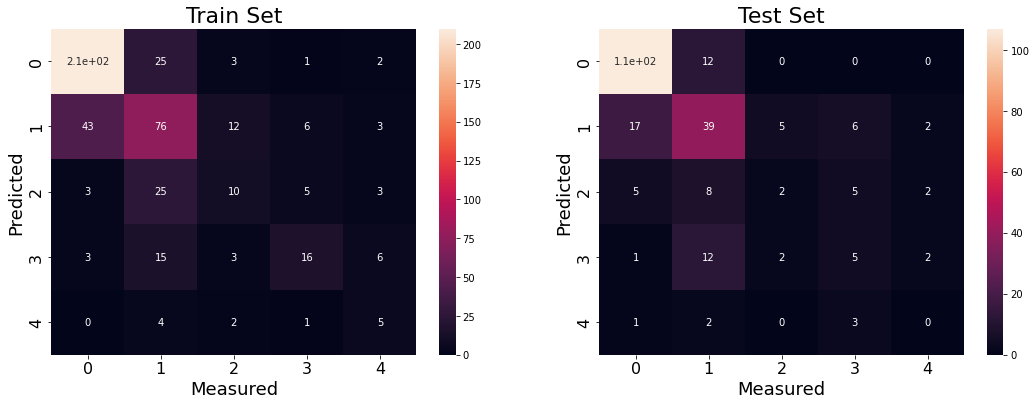

In [12]:
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_data_train, ax = ax[0], annot=True)
sns.heatmap(conf_data_test,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set',fontsize= 22);

In [13]:
conf_train_norm = np.zeros_like(conf_data_train, dtype=float)
conf_test_norm = np.zeros_like(conf_data_test, dtype=float)

sum_vec_train = np.sum(conf_data_train, axis = 1)
sum_vec_test  = np.sum(conf_data_test , axis = 1)

print('*'*100)

for irow in range(conf_train_norm.shape[0]):
    
    conf_train_norm[irow,:] = 100 * np.round(conf_data_train[irow,:]/sum_vec_train[irow],2)
    conf_test_norm[irow,:]  = 100 * np.round(conf_data_test[irow,:]/sum_vec_test[irow],2)

****************************************************************************************************


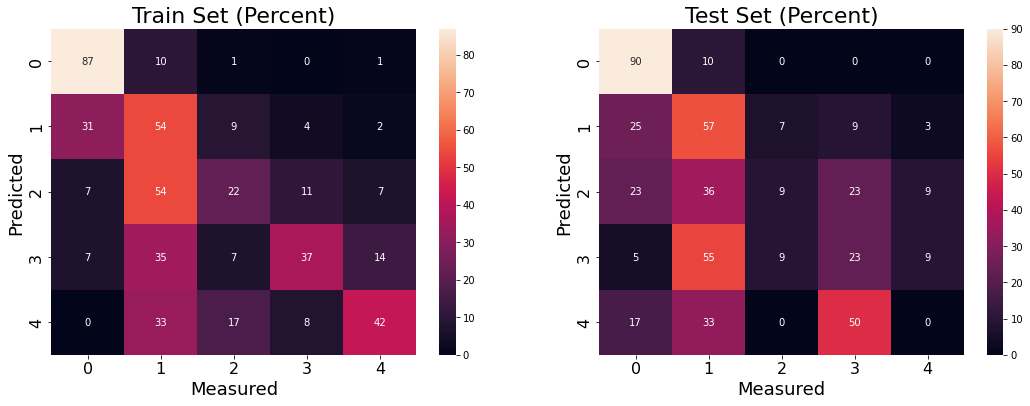

In [14]:
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_train_norm, ax = ax[0], annot=True)
sns.heatmap(conf_test_norm,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set (Percent)',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set (Percent)',fontsize= 22);

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
QDA = QuadraticDiscriminantAnalysis()
QDA.set_params(reg_param = 0)
QDA.fit(X_train, Y_train)
r2_train = np.round(QDA.score(X_train, Y_train),3)
r2_test  = np.round(QDA.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

print(cross_val_score(QDA, X_train,Y_train, cv = 3))
print(cross_val_score(QDA, X_test,Y_test, cv = 3))
print(np.mean(cross_val_score(QDA, X_train,Y_train, cv = 3)))
print(np.mean(cross_val_score(QDA, X_test,Y_test, cv = 3)))

Train score is :0.741
Test score is :0.639
[0.58385093 0.62111801 0.60625   ]
[0.575      0.67088608 0.60759494]
0.6037396480331262
0.6178270042194093


****************************************************************************************************


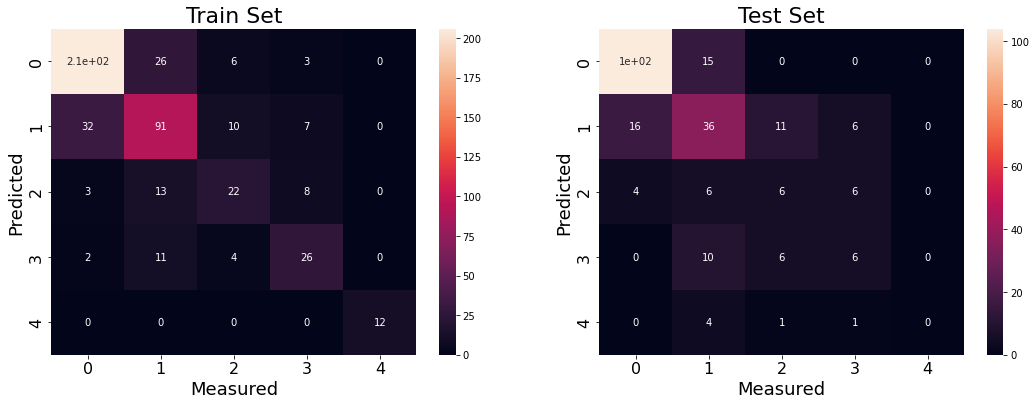

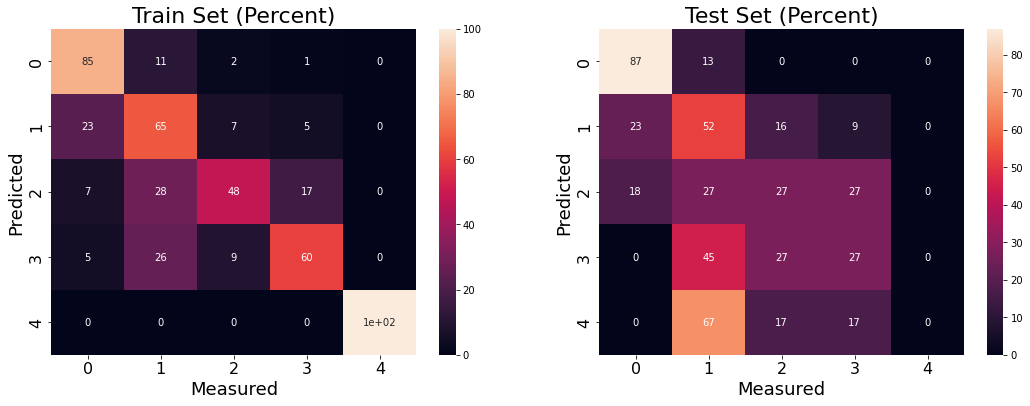

In [17]:
conf_data_train = confusion_matrix(Y_train,QDA.predict(X_train))
conf_data_test  = confusion_matrix(Y_test,QDA.predict(X_test))

fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_data_train, ax = ax[0], annot=True)
sns.heatmap(conf_data_test,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set',fontsize= 22);

conf_train_norm = np.zeros_like(conf_data_train, dtype=float)
conf_test_norm = np.zeros_like(conf_data_test, dtype=float)

sum_vec_train = np.sum(conf_data_train, axis = 1)
sum_vec_test  = np.sum(conf_data_test , axis = 1)

print('*'*100)

for irow in range(conf_train_norm.shape[0]):
    
    conf_train_norm[irow,:] = 100 * np.round(conf_data_train[irow,:]/sum_vec_train[irow],2)
    conf_test_norm[irow,:]  = 100 * np.round(conf_data_test[irow,:]/sum_vec_test[irow],2)
    
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_train_norm, ax = ax[0], annot=True)
sns.heatmap(conf_test_norm,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set (Percent)',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set (Percent)',fontsize= 22);

In [18]:
GNB = GaussianNB(var_smoothing = 1e-8)
GNB.fit(X_train, Y_train)
r2_train = np.round(GNB.score(X_train, Y_train),3)
r2_test  = np.round(GNB.score(X_test, Y_test),3)
print('Train score is :' + str(r2_train))
print('Test score is :' + str(r2_test))

print(cross_val_score(GNB, X_train,Y_train, cv = 3))
print(cross_val_score(GNB, X_test,Y_test, cv = 3))
print(np.mean(cross_val_score(GNB, X_train,Y_train, cv = 3)))
print(np.mean(cross_val_score(GNB, X_test,Y_test, cv = 3)))

Train score is :0.637
Test score is :0.66
[0.55900621 0.44720497 0.59375   ]
[0.5125     0.41772152 0.46835443]
0.5333203933747411
0.4661919831223629


****************************************************************************************************


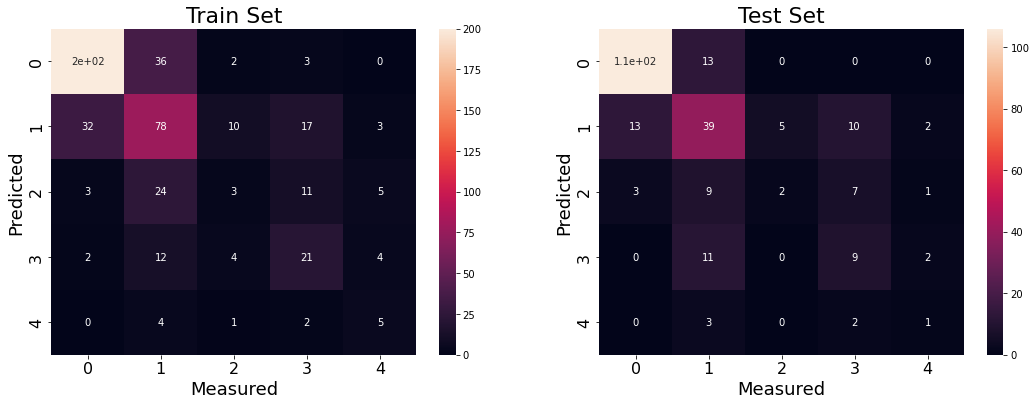

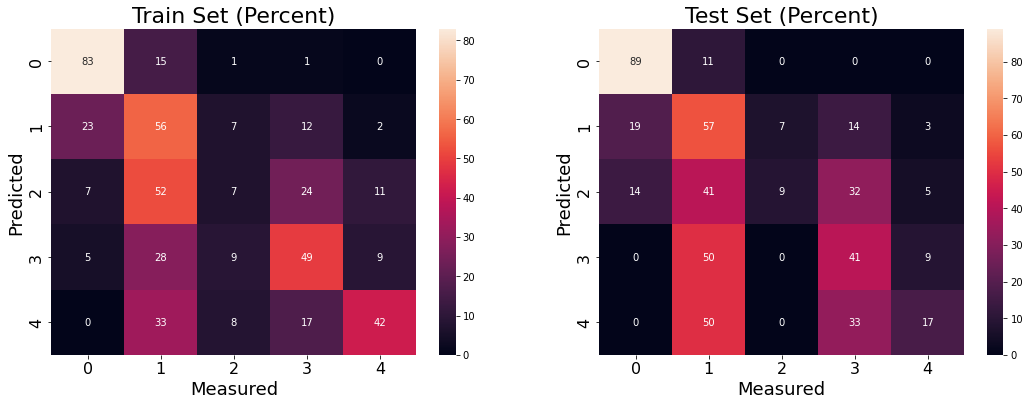

In [19]:
conf_data_train = confusion_matrix(Y_train,GNB.predict(X_train))
conf_data_test  = confusion_matrix(Y_test,GNB.predict(X_test))

fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_data_train, ax = ax[0], annot=True)
sns.heatmap(conf_data_test,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set',fontsize= 22);

conf_train_norm = np.zeros_like(conf_data_train, dtype=float)
conf_test_norm = np.zeros_like(conf_data_test, dtype=float)

sum_vec_train = np.sum(conf_data_train, axis = 1)
sum_vec_test  = np.sum(conf_data_test , axis = 1)

print('*'*100)

for irow in range(conf_train_norm.shape[0]):
    
    conf_train_norm[irow,:] = 100 * np.round(conf_data_train[irow,:]/sum_vec_train[irow],2)
    conf_test_norm[irow,:]  = 100 * np.round(conf_data_test[irow,:]/sum_vec_test[irow],2)
    
fig, ax = plt.subplots(1,2,figsize= (18,6))
sns.heatmap(conf_train_norm, ax = ax[0], annot=True)
sns.heatmap(conf_test_norm,  ax = ax[1], annot=True)

ax[0].tick_params(axis='both',labelsize=16)
ax[0].set_xlabel('Measured', fontsize= 18)
ax[0].set_ylabel('Predicted', fontsize= 18)
ax[0].set_title('Train Set (Percent)',fontsize= 22)

ax[1].tick_params(axis='both',labelsize=16)
ax[1].set_xlabel('Measured', fontsize= 18)
ax[1].set_ylabel('Predicted', fontsize= 18)
ax[1].set_title('Test Set (Percent)',fontsize= 22);

In [20]:
from PlottingFunction import multivariate_normal, multivariate_normal_plot, show_sample

In [21]:
from PlottingFunction import lda_1Dplot, plotModel, data_1Dplot

In [22]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

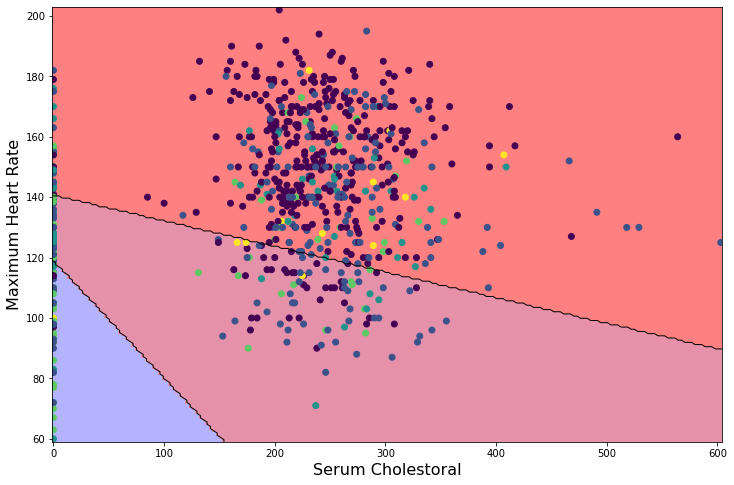

In [23]:
LDAPlot = LinearDiscriminantAnalysis()
LDAPlot.fit(X_train.loc[:,['chol','thalach']],Y_train)
fig, axis = plt.subplots(1,1,figsize=(12,8))
plotModel(LDAPlot,X.loc[:,'chol'],X.loc[:,'thalach'],Y)
plt.xlabel('Serum Cholestoral', fontsize= 16)
plt.ylabel('Maximum Heart Rate', fontsize= 16);

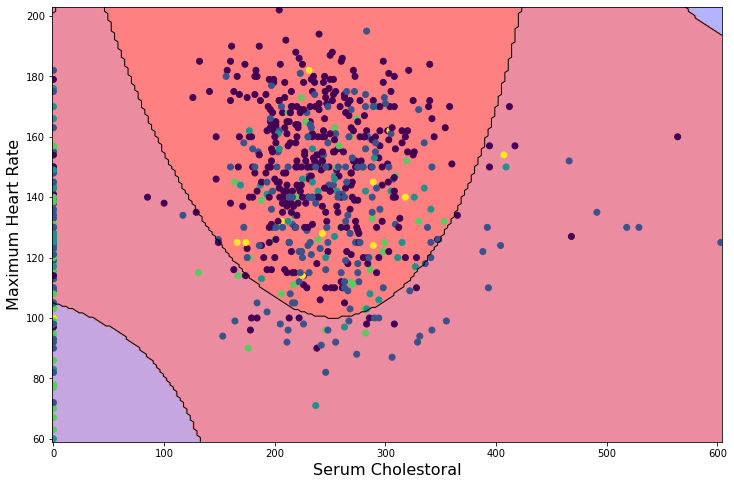

In [24]:
QDAPlot = QuadraticDiscriminantAnalysis()
QDAPlot.fit(X_train.loc[:,['chol','thalach']],Y_train)
fig, axis = plt.subplots(1,1,figsize=(12,8))
plotModel(QDAPlot,X.loc[:,'chol'],X.loc[:,'thalach'],Y)
plt.xlabel('Serum Cholestoral', fontsize= 16)
plt.ylabel('Maximum Heart Rate', fontsize= 16);